<h1>Live Fast, Diode Young</h1>

In [2]:
%pylab inline
import getdata as gd

Populating the interactive namespace from numpy and matplotlib


<h3>Objective:</h3>
    <p>Read the data from 'jv.txt'</p>

In [3]:
#From the get_data.py script I used for 006
d = gd.data_dict('jv.txt', delim=' ')

In [4]:
#Set data and header lists
data = d.get('data', None)
headers = d.get('headers', None)

<h3>Objective 2:</h3>
<p>Extract J<sub>SC</sub>, V<sub>OC</sub>, FF and Efficiency</p>

In [5]:
#First thing's first - convert y data from Amps to mA/cm^2
#In this case the cell area is 0.25cm^2
#i.e. multiply by 1000 and divie by 0.25
y = array(data[1])*1000/.25 #need to use array() here to multiply list by scalar
y = y*-1 #I'll do this so that my extracted Jsc is +ve
x = array(data[0])

In [6]:
#Get Jsc
#y = Jsc when x = 0

#get the index of x that is closest to zero
idx = abs(x-0).argmin()

#get value of y at idx - this is the jsc
jsc = y[idx]

In [7]:
#Get Voc
#x = Voc when y = 0

#This is a bit tricker because I don't have a value for x(y=0)
#I'll interpolate my data to get a value y as close to 0 as possible

xi = linspace(-1, 1, 10000)
yi = interp(xi, x, y)

idy = abs(yi-0).argmin()
voc = xi[idy]

In [8]:
#GET FF

#FF = Pmax/(Jsc*Voc)

#create Power array
P = xi*yi

#find the index of P that contains the largest value (max Power)
idp = list(P).index(P.max())

#calculate FF
FF = P[idp]/(jsc*voc)

In [9]:
#Assuming input spectrum is AM1.5 (i.e. 1000W/m^2)

#Eff = Jsc*Voc*FF

Eff = jsc*voc*FF

In [10]:
print 'Jsc = {0:.2f} mA/cm^2, FF = {2:.2f} (%), Eff = {3:.2f} (%)'.format(jsc, voc, FF*100, Eff)

Jsc = 15.36 mA/cm^2, FF = 61.05 (%), Eff = 5.90 (%)


In [11]:
params = {'jsc': jsc,
          'voc': voc,
          'FF': FF,
          'Eff': Eff}

In [12]:
params

{'Eff': 5.8971038296205904,
 'FF': 0.61054513127097976,
 'jsc': 15.356631949543953,
 'voc': 0.62896289628962898}

In [13]:
#Can put all this into a single function
def jvrip(d, area=0.25):
    data = d.get('data')
    
    y = array(data[1])*1000/area #need to use array() here to multiply list by scalar
    y = y*-1 #I'll do this so that my extracted Jsc is +ve
    x = array(data[0])
    
    xi = linspace(-1, 1, 1e4)
    yi = interp(xi, x, y)
    
    #jsc
    idx = abs(xi-0).argmin()
    jsc = yi[idx]
    
    #voc    
    idy = abs(yi-0).argmin()
    voc = xi[idy]
    
    #FF
    P = xi*yi
    idp = list(P).index(P.max())
    FF = P[idp]/(jsc*voc)
    
    #Eff
    Eff = jsc*voc*FF
    
    return {'jsc': jsc,
            'voc': voc,
            'FF': FF,
            'Eff': Eff} 

In [50]:
p = jvrip(d)

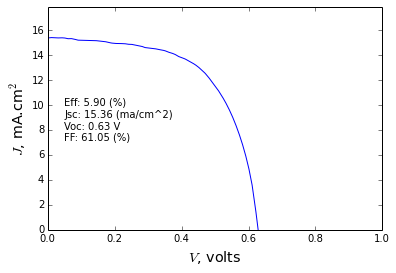

In [76]:
#You can put all this onto a JV curve plot
fig = figure()
ax = fig.add_subplot(111)
l1, = ax.plot(xi,yi,'-',color='blue')
yrange = max(yi)-min(yi)
ylim = [0, max(yi)*1.1]
ax.set_ylim(ylim)
ax.set_xlim([0,1])
ax.set_xlabel('$V$, volts')
ax.set_ylabel('$J$, mA.cm$^{2}$')
text = 'Eff: {0:.2f} (%)\nJsc: {1:.2f} (ma/cm^2)\nVoc: {2:.2f} V\nFF: {3:.2f} (%)'.format(p.get('Eff'), p.get('jsc'), p.get('voc'), p.get('FF')*100)
ax.annotate(text, xy=(0.05, 0.4), xycoords='axes fraction')